# Multiclass Classification and Neural Networks

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

## Multiclass Classification

#### Import data

In [25]:
data = loadmat('data/ex3data1.mat')
X = np.c_[np.ones(data['X'].shape[0]), data['X']]
y = data['y']

m = X.shape[0]
n = X.shape[1]

print(m, n)

5000 401


#### Visualize data

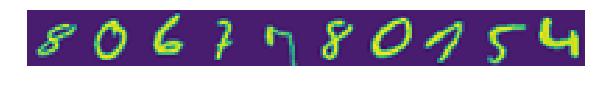

In [28]:
rand_sample = np.random.randint(0, X.shape[0] + 1, 10)
dataPlot = X[rand_sample, 1:].reshape(-1, 20).T
img = plt.imshow(dataPlot)
plt.axis('off');

#### Vectorize Logistic Regression

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def reg_cost(theta, X, y, myLambda):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    
    J = (-1/m) * ( y.T.dot( np.log(h) ) + (1 - y.T).dot( np.log( 1 - h ) ) ) + ( myLambda/(2*m) ) * np.sum( np.square(theta[1:]) )
    
    if np.isnan(J[0]):
        return(np.inf)
    
    return (J[0])


In [33]:
def reg_gradient(theta, X, y, myLambda):
    n = X.shape[1]
    theta = np.array(theta).reshape(n, 1)
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    gradient = ((1/m) * (h - y).T.dot( X )).T + (myLambda/m) * np.r_[ [[0]], theta[1:] ]
    return gradient.flatten()

#### One-vs-All classification

In [38]:
def one_vs_all(X, y, num_labels, myLambda):
    n = X.shape[1]
    initial_theta = np.zeros((n, 1))
    all_theta = np.zeros((num_labels, n))
    
    for i in np.arange( 1, num_labels + 1 ):
        reg_log_regr = minimize( fun = reg_cost, x0 = initial_theta, 
                                   args = (X, (y == i)*1, myLambda), jac = reg_gradient, 
                                   options = {'maxiter' : 100} )
        all_theta[i - 1] = reg_log_regr.x     
    return all_theta

#### Prediction

In [39]:
myLambda = 0.1
all_thetas = one_vs_all(X, y, 10, myLambda)
print(all_thetas.shape)

(10, 401)


In [40]:
def predict_one_vs_all(all_thetas, X):
    prob = sigmoid(X.dot(all_thetas.T))
    return (np.argmax(prob, axis = 1) + 1)


In [41]:
predictions = predict_one_vs_all(all_thetas, X)
print(predictions.shape)

(5000,)


#### Accuracy

In [42]:
accuracy = np.mean((y.ravel() == predictions) * 100)
print(accuracy)

94.94


## Neural Network

#### Load pre-trained weights

In [44]:
weights = loadmat('data/ex3weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


#### Feedforward propagation

In [45]:
def ff(Theta1, Theta2, X):
    z2 = Theta1.dot(X.T)
    a2 = np.r_[np.ones((1, z2.shape[1])), sigmoid(z2)].T
    a3 = predict_one_vs_all(Theta2, a2)
    return a3

#### Accuracy

In [46]:
tr_accuracy = np.mean((y.ravel() == ff(Theta1, Theta2, X)) * 100)
print( tr_accuracy)

97.52
